<center> <h1> International trade  </h1> </center>
<center> <h2> Charvan Chaikhmous, Duchesne Sylvain, Blart Louise   </h2> </center>

# 0- Pre-processing : create datasets


In [56]:
# import
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import geopandas

#!git clone https://github.com/taynaud/python-louvain.git
#!pip install python-louvain
import community as community_louvain

In [3]:
#Code that extracts the data we use from a much larger dataset that comes from here https://git.nomics.world/dbnomics-source-data/cepii-source-data/-/blob/master/TRADE/trade_chel_YYYYMMDD.csv
"""
trade=pd.read_csv('trade_data.csv', usecols=['exporter', 'importer', 'secgroup', 'product', 'v2020', 'v2018','v2019'], sep=';')
trade_undifferenciated=trade[trade['product']=='TT']
trade_undifferenciated=trade_undifferenciated[['exporter','importer','secgroup','product','v2020', 'v2018','v2019']]
trade_undifferenciated.to_csv('Data_exports.csv')
"""

"\ntrade=pd.read_csv('trade_data.csv', usecols=['exporter', 'importer', 'secgroup', 'product', 'v2020', 'v2018','v2019'], sep=';')\ntrade_undifferenciated=trade[trade['product']=='TT']\ntrade_undifferenciated=trade_undifferenciated[['exporter','importer','secgroup','product','v2020', 'v2018','v2019']]\ntrade_undifferenciated.to_csv('Data_exports.csv')\n"

In [9]:
# data=pd.read_csv('Data_exports_3years.csv', index_col=0)
data=pd.read_csv('Data_exports_3years.csv', index_col=0, sep=";")
data

exporter importer secgroup product          v2020          v2018  \
Column1                                                                    
72           AES      AES      CAT      TT  227476.045916  281739.772971   
456          AES      AFA      CAT      TT    1437.590947    1468.127508   
840          AES      AFN      CAT      TT    5408.519442    6412.925102   
1224         AES      AFR      CAT      TT   47568.935618   56280.987236   
1608         AES      AFS      CAT      TT   16271.739595   18221.008905   
...          ...      ...      ...     ...            ...            ...   
7417416      YUG      VEN      CAT      TT       1.633391       2.329487   
7417800      YUG      VNM      CAT      TT     114.547872     115.641546   
7418184      YUG      WLD      CAT      TT   85068.226420   88358.844531   
7418568      YUG      XXX      CAT      TT     132.854201     214.198379   
7418952      YUG      YUG      CAT      TT   17194.157859   18406.561476   

                 v2019  
Column1                 
72       259984.826826  
456        1343.455107  
840        6402.037064  
1224      55060.219805  
1608      17416.171171  
...                ...  
7417416       0.969835  
7417800     111.686894  
7418184   88344.314071  
7418568     201.497914  
7418952   18437.719275  

[19321 rows x 7 columns]

In [5]:
code_country= pd.read_csv('country_codes_3.csv', encoding='latin-1', sep=';')
code_country_reduced=code_country[['iso_3digit_alpha', 'country_name_abbreviation']]
code_country_reduced

iso_3digit_alpha country_name_abbreviation
0                AFG               Afghanistan
1                ALB                   Albania
2                DZA                   Algeria
3                ASM            American Samoa
4                AND                   Andorra
..               ...                       ...
222              WLF    Wallis and Futuna Isds
223              WSM                     Samoa
224              YEM                     Yemen
225              SCG     Serbia and Montenegro
226              ZMB                    Zambia

[227 rows x 2 columns]

In [11]:
dic = code_country_reduced.set_index('iso_3digit_alpha').T.to_dict('list')

list_false_country=['ASM', 'IOT', 'VGB', 'CYM', 'CXR','CCK', 'COK','CSK','FLK', 'PYF', 'ATF', 'GIB','KIR', 'GRL','GUM',
                    'MAC', 'MUS', 'MSR', 'ANT', 'CUW', 'ABW', 'SXM', 'BES', 'NCL', 'NIU', 'NFK', 'MNP', 'PCN',
                   "BLM", 'SHN', 'KNA', 'AIA', 'LCA','SPM', 'VCT','SMR', 'STP', 'ZAF', 'TKL', 'TTO', 'TCA','SUN', 'WLF']
for i in list_false_country :
    dic.pop(i)

def complete_name (x):
    if x in dic.keys() :
        return dic[x][0]
    else :
        return ''
data['exporter_name']=data['exporter'].apply(complete_name)
data['importer_name']=data['importer'].apply(complete_name)

data

C:\Users\louis\AppData\Local\Temp\ipykernel_1384\2712139013.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dic = code_country_reduced.set_index('iso_3digit_alpha').T.to_dict('list')


exporter importer secgroup product          v2020          v2018  \
Column1                                                                    
72           AES      AES      CAT      TT  227476.045916  281739.772971   
456          AES      AFA      CAT      TT    1437.590947    1468.127508   
840          AES      AFN      CAT      TT    5408.519442    6412.925102   
1224         AES      AFR      CAT      TT   47568.935618   56280.987236   
1608         AES      AFS      CAT      TT   16271.739595   18221.008905   
...          ...      ...      ...     ...            ...            ...   
7417416      YUG      VEN      CAT      TT       1.633391       2.329487   
7417800      YUG      VNM      CAT      TT     114.547872     115.641546   
7418184      YUG      WLD      CAT      TT   85068.226420   88358.844531   
7418568      YUG      XXX      CAT      TT     132.854201     214.198379   
7418952      YUG      YUG      CAT      TT   17194.157859   18406.561476   

                 v2019 exporter_name importer_name  
Column1                                             
72       259984.826826                              
456        1343.455107                              
840        6402.037064                              
1224      55060.219805                              
1608      17416.171171                              
...                ...           ...           ...  
7417416       0.969835                   Venezuela  
7417800     111.686894                    Viet Nam  
7418184   88344.314071                              
7418568     201.497914                              
7418952   18437.719275                              

[19321 rows x 9 columns]

In [7]:
list_false_country=['ASM', 'IOT', 'VGB', 'CYM', 'CXR','CCK', 'COK','CSK','FLK', 'PYF', 'ATF', 'GIB','KIR', 'GRL','GUM',
                    'MAC', 'MUS', 'MSR', 'ANT', 'CUW', 'ABW', 'SXM', 'BES', 'NCL', 'NIU', 'NFK', 'MNP', 'PCN',
                   "BLM", 'SHN', 'KNA', 'AIA', 'LCA','SPM', 'VCT','SMR', 'STP', 'ZAF', 'TKL', 'TTO', 'TCA','SUN', 'WLF']
for i in list_false_country :
    dic.pop(i)

def complete_name (x):
    if x in dic.keys() :
        return dic[x][0]
    else :
        return ''
data['exporter_name']=data['exporter'].apply(complete_name)
data['importer_name']=data['importer'].apply(complete_name)

In [12]:
data_complete = data[(data["importer_name"] != "") & (data["exporter_name"] != "")]

In [13]:
len(data_complete['importer_name'].unique())

80

In [14]:
def add_relative_volume(df, year):
    df_temp = df.copy()
    rel_vols = []
    for exp in df_temp.exporter.unique():
        total_volume = df_temp[df_temp["exporter"] == exp]["v"+str(year)].sum()
        for vol in df_temp[df_temp["exporter"] == exp]["v"+str(year)]:
            rel_vol = vol/total_volume
            rel_vols.append(rel_vol)
    df_temp["relative_volume"+"_"+str(year)] = rel_vols
    return df_temp

In [15]:
data_complete=add_relative_volume(data_complete, 2018)
data_complete=add_relative_volume(data_complete, 2019)
data_complete=add_relative_volume(data_complete, 2020)

In [16]:
data_relevant=data_complete[data_complete['relative_volume_2020']>.05]

In [17]:
data_relevant.to_csv("data_relevant_mars_30", index = False)
data_complete.to_csv('data_complete_3_years.csv', index = False)

# 1 - Descriptive analyzes with complete data

In [23]:
data_complete

exporter importer secgroup product         v2020         v2018  \
Column1                                                                  
322632       ALB      ALB      CAT      TT      0.000000      0.000000   
326088       ALB      ARG      CAT      TT      0.331972      0.260846   
327624       ALB      AUS      CAT      TT      2.099945      5.103496   
328008       ALB      AUT      CAT      TT     28.753344     29.996366   
328776       ALB      BEL      CAT      TT      2.912183      3.848980   
...          ...      ...      ...     ...           ...           ...   
7256136      VNM      UKR      CAT      TT    469.650495    420.582012   
7256520      VNM      URY      CAT      TT     61.885624     58.309505   
7256904      VNM      USA      CAT      TT  74124.562477  45411.468563   
7257288      VNM      VEN      CAT      TT     22.617408     22.516020   
7257672      VNM      VNM      CAT      TT      0.000000      0.000000   

                v2019 exporter_name       importer_name  relative_volume_2018  \
Column1                                                                         
322632       0.000000       Albania             Albania              0.000000   
326088       0.600098       Albania           Argentina              0.000120   
327624       3.573215       Albania           Australia              0.002354   
328008      35.448914       Albania             Austria              0.013834   
328776       5.427032       Albania  Belgium-Luxembourg              0.001775   
...               ...           ...                 ...                   ...   
7256136    437.185631      Viet Nam             Ukraine              0.001668   
7256520     61.332123      Viet Nam             Uruguay              0.000231   
7256904  61879.449603      Viet Nam                 USA              0.180129   
7257288     20.980374      Viet Nam           Venezuela              0.000089   
7257672      0.000000      Viet Nam            Viet Nam              0.000000   

         relative_volume_2019  relative_volume_2020  
Column1                                              
322632               0.000000              0.000000  
326088               0.000271              0.000172  
327624               0.001614              0.001087  
328008               0.016010              0.014887  
328776               0.002451              0.001508  
...                       ...                   ...  
7256136              0.001573              0.001550  
7256520              0.000221              0.000204  
7256904              0.222713              0.244655  
7257288              0.000076              0.000075  
7257672              0.000000              0.000000  

[6400 rows x 12 columns]

In [19]:
print('Number of exporters' , len(data_complete.exporter_name.unique()) )
print('Number of importers', len(data_complete.importer_name.unique()) )

Number of exporters 80
Number of importers 80


In [22]:
list(data_complete.importer_name.unique()) == list(data_complete.exporter_name.unique())

True

We work with a dataset of 6400 rows and 12 columns, representing trade between 80 contries.

In [24]:
d = {'Country': data_complete.exporter_name.unique()}
By_Country = pd.DataFrame(data=d)

exp_2018 = []
exp_2020 = []

imp_2020 = []
imp_2018 = []

for country in By_Country.Country : 
    exp_2020.append(data_complete.loc[data_complete['exporter_name'] == country]['v2020'].sum())
    exp_2018.append(data_complete.loc[data_complete['exporter_name'] == country]['v2018'].sum())
    
    imp_2020.append(data_complete.loc[data_complete['importer_name'] == country]['v2020'].sum())
    imp_2018.append(data_complete.loc[data_complete['importer_name'] == country]['v2018'].sum())
    
By_Country['exp_2018'] = exp_2018
By_Country['exp_2020'] = exp_2020

By_Country['imp_2020'] = imp_2020
By_Country['imp_2018'] = imp_2018

By_Country['trade_balance_2020'] = By_Country['exp_2020']  - By_Country['imp_2020']
By_Country['trade_balance_2018'] = By_Country['exp_2018']  - By_Country['imp_2018']

By_Country['ratio_exp_2020_2018'] =  By_Country['exp_2020']/By_Country['exp_2018']

By_Country['ratio_imp_2020_2018'] =  By_Country['imp_2020']/By_Country['imp_2018']
By_Country['ratio_balance_2020_2018'] =  By_Country['trade_balance_2020'] / By_Country['trade_balance_2018']

By_Country
By_Country.to_csv('By_Country.csv', index = False)

Country      exp_2018      exp_2020      imp_2020  \
0              Albania  2.168300e+03  1.931458e+03  5.194407e+03   
1            Argentina  5.766592e+04  5.310376e+04  4.106762e+04   
2            Australia  2.323897e+05  2.290638e+05  1.802182e+05   
3              Austria  1.677247e+05  1.542132e+05  1.576361e+05   
4   Belgium-Luxembourg  2.980566e+05  2.772950e+05  2.876453e+05   
..                 ...           ...           ...           ...   
75             Ukraine  4.740671e+04  4.764214e+04  5.477827e+04   
76             Uruguay  8.365434e+03  7.341809e+03  8.805665e+03   
77                 USA  1.280713e+06  1.099495e+06  2.083720e+06   
78           Venezuela  3.154036e+04  4.405493e+03  7.696720e+03   
79            Viet Nam  2.521053e+05  3.029756e+05  2.630811e+05   

        imp_2018  trade_balance_2020  trade_balance_2018  ratio_exp_2020_2018  \
0   5.348314e+03        -3262.948961        -3180.014601             0.890771   
1   6.197809e+04        12036.144733        -4312.173629             0.920886   
2   2.021444e+05        48845.613274        30245.232612             0.985688   
3   1.754705e+05        -3422.907613        -7745.780413             0.919442   
4   3.281751e+05       -10350.270447       -30118.493714             0.930343   
..           ...                 ...                 ...                  ...   
75  5.814346e+04        -7136.129755       -10736.752416             1.004966   
76  1.141659e+04        -1463.855725        -3051.156121             0.877636   
77  2.274608e+06      -984225.498531      -993895.141399             0.858502   
78  1.475661e+04        -3291.226935        16783.746932             0.139678   
79  2.425580e+05        39894.481927         9547.334307             1.201782   

    ratio_imp_2020_2018  ratio_balance_2020_2018  
0              0.971223                 1.026080  
1              0.662615                -2.791201  
2              0.891532                 1.614986  
3              0.898362                 0.441906  
4              0.876499                 0.343652  
..                  ...                      ...  
75             0.942123                 0.664645  
76             0.771304                 0.479771  
77             0.916079                 0.990271  
78             0.521578                -0.196096  
79             1.084611                 4.178599  

[80 rows x 10 columns]

In [25]:
#reappend the iso3 for each each country. to successfully merge later on
iso_3s = []
for country in By_Country.Country.unique():
    iso_3 = data_complete[data_complete["exporter_name"] == country].exporter.to_list()[0]
    iso_3s.append(iso_3)
By_Country["iso_3digit_alpha"] = iso_3s
By_Country

Country      exp_2018      exp_2020      imp_2020  \
0              Albania  2.168300e+03  1.931458e+03  5.194407e+03   
1            Argentina  5.766592e+04  5.310376e+04  4.106762e+04   
2            Australia  2.323897e+05  2.290638e+05  1.802182e+05   
3              Austria  1.677247e+05  1.542132e+05  1.576361e+05   
4   Belgium-Luxembourg  2.980566e+05  2.772950e+05  2.876453e+05   
..                 ...           ...           ...           ...   
75             Ukraine  4.740671e+04  4.764214e+04  5.477827e+04   
76             Uruguay  8.365434e+03  7.341809e+03  8.805665e+03   
77                 USA  1.280713e+06  1.099495e+06  2.083720e+06   
78           Venezuela  3.154036e+04  4.405493e+03  7.696720e+03   
79            Viet Nam  2.521053e+05  3.029756e+05  2.630811e+05   

        imp_2018  trade_balance_2020  trade_balance_2018  ratio_exp_2020_2018  \
0   5.348314e+03        -3262.948961        -3180.014601             0.890771   
1   6.197809e+04        12036.144733        -4312.173629             0.920886   
2   2.021444e+05        48845.613274        30245.232612             0.985688   
3   1.754705e+05        -3422.907613        -7745.780413             0.919442   
4   3.281751e+05       -10350.270447       -30118.493714             0.930343   
..           ...                 ...                 ...                  ...   
75  5.814346e+04        -7136.129755       -10736.752416             1.004966   
76  1.141659e+04        -1463.855725        -3051.156121             0.877636   
77  2.274608e+06      -984225.498531      -993895.141399             0.858502   
78  1.475661e+04        -3291.226935        16783.746932             0.139678   
79  2.425580e+05        39894.481927         9547.334307             1.201782   

    ratio_imp_2020_2018  ratio_balance_2020_2018 iso_3digit_alpha  
0              0.971223                 1.026080              ALB  
1              0.662615                -2.791201              ARG  
2              0.891532                 1.614986              AUS  
3              0.898362                 0.441906              AUT  
4              0.876499                 0.343652              BEL  
..                  ...                      ...              ...  
75             0.942123                 0.664645              UKR  
76             0.771304                 0.479771              URY  
77             0.916079                 0.990271              USA  
78             0.521578                -0.196096              VEN  
79             1.084611                 4.178599              VNM  

[80 rows x 11 columns]

## 1.1 - Exports

In [27]:
By_Country.sort_values(by = 'exp_2018', ascending=False)[['Country','exp_2018']].head(5)

Country      exp_2018
15          China  2.209089e+06
21        Germany  1.463158e+06
77            USA  1.280713e+06
42          Japan  6.586532e+05
46  Rep. of Korea  5.522279e+05

In [28]:
By_Country.sort_values(by = 'exp_2020'  , ascending=False)[['Country','exp_2020']].head(5)

Country      exp_2020
15        China  2.162897e+06
21      Germany  1.299857e+06
77          USA  1.099495e+06
42        Japan  5.680480e+05
57  Netherlands  5.119334e+05

In [29]:
By_Country[By_Country['ratio_exp_2020_2018']>1][['Country','exp_2020','exp_2018','ratio_exp_2020_2018']]

Country       exp_2020       exp_2018  ratio_exp_2020_2018
11        Brunei Darussalam    7101.852385    6218.406285             1.142070
13              Switzerland  305081.664040  295307.466841             1.033098
17                 Cameroon    4012.172120    4008.043654             1.001030
33  China and Hong Kong SAR   49330.989615   41691.934531             1.183226
38                  Ireland  176367.013568  160181.080370             1.101048
63                   Poland  228970.463180  226987.155109             1.008738
75                  Ukraine   47642.141540   47406.705905             1.004966
79                 Viet Nam  302975.611313  252105.347203             1.201782

In [30]:
By_Country.sort_values(by = 'ratio_exp_2020_2018', ascending=False)[['Country','ratio_exp_2020_2018']].head(5)

Country  ratio_exp_2020_2018
79                 Viet Nam             1.201782
33  China and Hong Kong SAR             1.183226
11        Brunei Darussalam             1.142070
38                  Ireland             1.101048
13              Switzerland             1.033098

Top 5 biggest exportaters in 2018 : China, Germany, USA, Japan, Korea. Nearly the same order in 2020, with Netherlands in 5th place.
We can note a slight decrease of exports in 2020 for all the contries, except for 8 of them. <br/>
Expecially, Vietnamese exports increased by 20% between 2018 and 2020. Part of this performance is linked to the skilful management of the health crisis, as by reopening its factories earlier than others, Vietnam encouraged existing exporters to reallocate some of their production to the detriment of competitors such as India or Pakistan. <br/> 
Export in China and Hong Kong increase by 18% between 2018 and 2020. It's a direct impact of covid with export of hundreds fans, mask and more than two billion tests.



## 1.2 - Imports

In [31]:
By_Country.sort_values(by = 'imp_2018', ascending=False)[['Country','imp_2018']].head(5)

Country      imp_2018
77             USA  2.274608e+06
15           China  1.454140e+06
21         Germany  1.143163e+06
29          France  6.403833e+05
31  United Kingdom  6.028754e+05

In [32]:
By_Country.sort_values(by = 'imp_2020'  , ascending=False)[['Country','imp_2020']].head(5)

Country      imp_2020
77             USA  2.083720e+06
15           China  1.424088e+06
21         Germany  1.055009e+06
31  United Kingdom  5.637842e+05
29          France  5.404935e+05

In [33]:
By_Country[By_Country['ratio_imp_2020_2018']>1][['Country','imp_2020','imp_2018','ratio_imp_2020_2018']]

Country       imp_2020       imp_2018  ratio_imp_2020_2018
13    Switzerland  252475.809098  243753.976480             1.035781
16  Côte d'Ivoire   10614.508977    9888.893549             1.073377
17       Cameroon    7246.857730    5980.319778             1.211784
43     Kazakhstan   40768.303364   38311.806161             1.064119
56        Nigeria   52177.437775   43270.871698             1.205833
67   Saudi Arabia  112285.725517  108619.351756             1.033754
79       Viet Nam  263081.129386  242558.012896             1.084611

Top 5 biggest importer in 2018 : USA, China, Germany, France, United Kingdom. Nearly the same order for 2020. We can note a slight decrease of importation in 2020 for all the contries, except for 7 of them.

## 1.3 - Trade balance 

In [34]:
By_Country.sort_values(by = 'trade_balance_2018' )[['Country','trade_balance_2018']]

Country  trade_balance_2018
77                      USA      -993895.141399
31           United Kingdom      -151513.863668
33  China and Hong Kong SAR      -145737.057983
37                    India      -130458.057858
29                   France      -110660.658426
..                      ...                 ...
46            Rep. of Korea       126444.592579
67             Saudi Arabia       127439.601962
66       Russian Federation       184758.313962
21                  Germany       319995.506255
15                    China       754948.989544

[80 rows x 2 columns]

In [35]:
By_Country.sort_values(by = 'trade_balance_2020' )[['Country','trade_balance_2020']]

Country  trade_balance_2020
77                      USA      -984225.498531
31           United Kingdom      -223625.605302
29                   France       -91859.395835
33  China and Hong Kong SAR       -91185.459645
37                    India       -66673.927956
..                      ...                 ...
66       Russian Federation        93681.688519
52                   Mexico        98920.318636
55                 Malaysia       102083.952293
21                  Germany       244847.550443
15                    China       738809.102445

[80 rows x 2 columns]

In [36]:
By_Country[By_Country.Country == 'China'].exp_2020/By_Country.exp_2020.sum() *100

15    15.874386
Name: exp_2020, dtype: float64

In [37]:
By_Country.sort_values(by = 'ratio_balance_2020_2018')[['Country','ratio_balance_2020_2018']]

Country  ratio_balance_2020_2018
71         Sweden                -6.808945
16  Côte d'Ivoire                -4.036174
1       Argentina                -2.791201
56        Nigeria                -1.358428
59    New Zealand                -0.361990
..            ...                      ...
36      Indonesia                 1.957019
23        Algeria                 1.995937
79       Viet Nam                 4.178599
14          Chile                 4.526154
24        Ecuador                 7.258959

[80 rows x 2 columns]

Unsurprisingly, the trade balance with higher deficits is the United-States (2018 and 2020). The two most excess balances are China and Germany. Chinese exports represent 15% of world exports. <br/>
We can see that France is at the 5th place of the most deficit country in 2018. In 2020, France is at the 3rd place. The covid crisis has affected two of our strong points in terms of foreign trade: aeronautics and tourism. Moreover, 
the essential goods for fighting Covid-19 (masks, gloves, respirators, etc.) also weakened the French trade balance in 2020.

# 2 - Construction Graph

In [38]:
list_country=list(data_relevant['importer_name'].unique())

In [39]:
Graph_2020=nx.Graph()
Graph_2020.add_nodes_from(list_country)
Graph_2020.add_edges_from(zip(data_relevant['exporter_name'],data_relevant['importer_name']))

In [40]:
'''plt.figure(3, figsize=(50,50))
nx.draw(Graph_2020, with_labels=True, font_size=12)
plt.savefig('graph_2020.png', dpi=300, bbox_inches='tight')
plt.show()'''

"plt.figure(3, figsize=(50,50))\nnx.draw(Graph_2020, with_labels=True, font_size=12)\nplt.savefig('graph_2020.png', dpi=300, bbox_inches='tight')\nplt.show()"

In [41]:
'''#in the following create a MULTIDIGRAPH. meaniing a graph which has multiple directed edges

Graph_2020_2=nx.MultiDiGraph()
Graph_2020_2 = nx.from_pandas_edgelist(data_relevant, 'exporter', 'importer', True, nx.MultiDiGraph())
plt.figure(3, figsize=(70,50))

nx.draw(Graph_2020_2, with_labels=True, font_size=50)
# plt.savefig('graph_2020.png', dpi=300, bbox_inches='tight')
plt.show()'''

"#in the following create a MULTIDIGRAPH. meaniing a graph which has multiple directed edges\n\nGraph_2020_2=nx.MultiDiGraph()\nGraph_2020_2 = nx.from_pandas_edgelist(data_relevant, 'exporter', 'importer', True, nx.MultiDiGraph())\nplt.figure(3, figsize=(70,50))\n\nnx.draw(Graph_2020_2, with_labels=True, font_size=50)\n# plt.savefig('graph_2020.png', dpi=300, bbox_inches='tight')\nplt.show()"

In [42]:
'''
node size respectively to the total volume (of imports or exports or both??)
node color respectively to a positive or negative total volume
edgesize respectively to the volume
colored edge, if important trading (>1%)
'''

'\nnode size respectively to the total volume (of imports or exports or both??)\nnode color respectively to a positive or negative total volume\nedgesize respectively to the volume\ncolored edge, if important trading (>1%)\n'

In [43]:
'''
define function that creates columns in our dataset

total_volume of exporter and importer. this will be the weight that introduces the node_size
net_trade_balance: if export_volume of exporter greater than import_volume of exporter, we have a netto export, 
which is  economically good. set node_color as green if positive and red if negative
set edge_color as blue if a certain trade is very important to the exporter (or importer?), i.e. if relative volume is larger 1%

#maybe move this step to the first notebook
'''
def introduce_total_volume(df):
    df_temp = df.copy()
    tot_vol_exp = []
    tot_vol_imp = []
    for exp in df_temp.exporter_name:
        tot_vol_exp.append(df_temp[df_temp["exporter_name"] == exp]["v2020"].sum())
    for imp in df_temp.importer_name:
        tot_vol_imp.append(df_temp[df_temp["importer_name"] == imp]["v2020"].sum())
    df_temp["total_volume_exporter"] = tot_vol_exp
    df_temp["total_volume_importer"] = tot_vol_imp
    
    return df_temp

In [44]:
data_relevant = introduce_total_volume(data_relevant)

In [45]:
def introduce_color(df):
    '''
    introduce node color and edge color.
    node color is green when country is net exporter and red otherwise
    edge color is pink when trade is an important factor, i.e. larger than 0.2 (OR 1% ???) of total export volume and black otherwise
    '''
    df_temp = df.copy()
    node_color_exporter = []
    edge_color = []
    
    #it seems we have countries where we have only data for exports but no imports (eg ALBANIA),
    #or vice versa, only imports no imports
    for country in df_temp.exporter_name:
        if len(df_temp[df_temp["exporter_name"] == country]["total_volume_exporter"]) == 0:
            export_vol =0
        else: 
            export_vol =  list(df_temp[df_temp["exporter_name"] == country]["total_volume_exporter"])[0]

        if len(df_temp[df_temp["importer_name"] == country]["total_volume_importer"])==0:
            import_vol=0
        else: 
            import_vol = list(df_temp[df_temp["importer_name"] == country]["total_volume_importer"])[0]
            
        if export_vol > import_vol:
            node_color_exporter.append("springgreen")
        else:
            node_color_exporter.append("salmon")
    
    for element in df_temp.relative_volume:
        if element>0.2:
            edge_color.append("purple")
        else:
            edge_color.append("darkgrey")
            
    df_temp["node_color_exporter"] = node_color_exporter
    df_temp["edge_color"] = edge_color
    
    return df_temp

In [153]:
data_relevant = introduce_color(data_relevant)
data_relevant

exporter importer secgroup product         v2020 exporter_name  \
0        ALB      DEU      CAT      TT    158.091928       Albania   
1        ALB      ESP      CAT      TT    153.783585       Albania   
2        ALB      GRC      CAT      TT    136.735389       Albania   
3        ALB      ITA      CAT      TT    786.785264       Albania   
4        ARG      BRA      CAT      TT   8239.436776     Argentina   
..       ...      ...      ...     ...           ...           ...   
372      VEN      MYS      CAT      TT    419.944433     Venezuela   
373      VNM      CHN      CAT      TT  74888.702313      Viet Nam   
374      VNM      JPN      CAT      TT  20585.290628      Viet Nam   
375      VNM      KOR      CAT      TT  19698.097677      Viet Nam   
376      VNM      USA      CAT      TT  74124.562477      Viet Nam   

                              importer_name  relative_volume  \
0                                   Germany         0.081851   
1                                     Spain         0.079620   
2                                    Greece         0.070794   
3                                     Italy         0.407353   
4                                    Brazil         0.155157   
..                                      ...              ...   
372                                Malaysia         0.095323   
373                                   China         0.247177   
374                                   Japan         0.067944   
375                       Republic of Korea         0.065015   
376  USA- Puerto Rico and US Virgin Islands         0.244655   

     total_volume_exporter  total_volume_importer node_color_exporter  \
0              1235.396165           9.446677e+05         springgreen   
1              1235.396165           9.850712e+04         springgreen   
2              1235.396165           2.134954e+03         springgreen   
3              1235.396165           2.125364e+05         springgreen   
4             24298.725343           1.538184e+04         springgreen   
..                     ...                    ...                 ...   
372            3405.197145           2.642917e+04         springgreen   
373          189296.653095           1.297950e+06         springgreen   
374          189296.653095           3.895277e+05         springgreen   
375          189296.653095           9.928074e+04         springgreen   
376          189296.653095           2.024090e+06         springgreen   

    edge_color  
0     darkgrey  
1     darkgrey  
2     darkgrey  
3       purple  
4     darkgrey  
..         ...  
372   darkgrey  
373     purple  
374   darkgrey  
375   darkgrey  
376     purple  

[377 rows x 12 columns]

In [156]:
#preparing nodecoloring in draw command 

color_map = []
for node in Graph_2020_2.nodes:
    color = list(data_relevant[data_relevant["exporter"] == node]["node_color_exporter"])[0]
    color_map.append(color)
color_map

['springgreen',
 'salmon',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'salmon',
 'salmon',
 'springgreen',
 'springgreen',
 'salmon',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'salmon',
 'salmon',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'salmon',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgre

In [ ]:
#in the following create a MULTIDIGRAPH. meaniing a graph which has multiple directed edges

Graph_2020_2=nx.MultiDiGraph()
Graph_2020_2 = nx.from_pandas_edgelist(data_relevant, 'exporter', 'importer', True, nx.MultiDiGraph())
plt.figure(3, figsize=(70,50))

nx.draw(Graph_2020_2, 
        with_labels=True, 
        font_size=80, 
        node_color=color_map, 
        node_size=10000, #this should be dependent of exporter volume, or maybe log of exportervolume
        edge_color=data_relevant.edge_color,
        width = 10
        #this should be dependent on trade volume
       )
# plt.savefig('graph_2020.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
liste_UE=['Germany', 'Spain', 'Greece', 'Italy','France','Netherlands', 'Poland','Austria', 'Croatia', 'Slovenia',
         'Slovakia','Sweden','Portugal', 'Finland', 'Lithuania', 'Latvia',
       'Belgium', 'Ireland', 'Bulgaria', 'Cyprus','Hungary', 'Denmark','Estonia','Czechia','Bulgaria','Cyprus','Malta']
def is_in_UE(x):
    if x in liste_UE :
        return 'blue'
    else :
        return 'red'

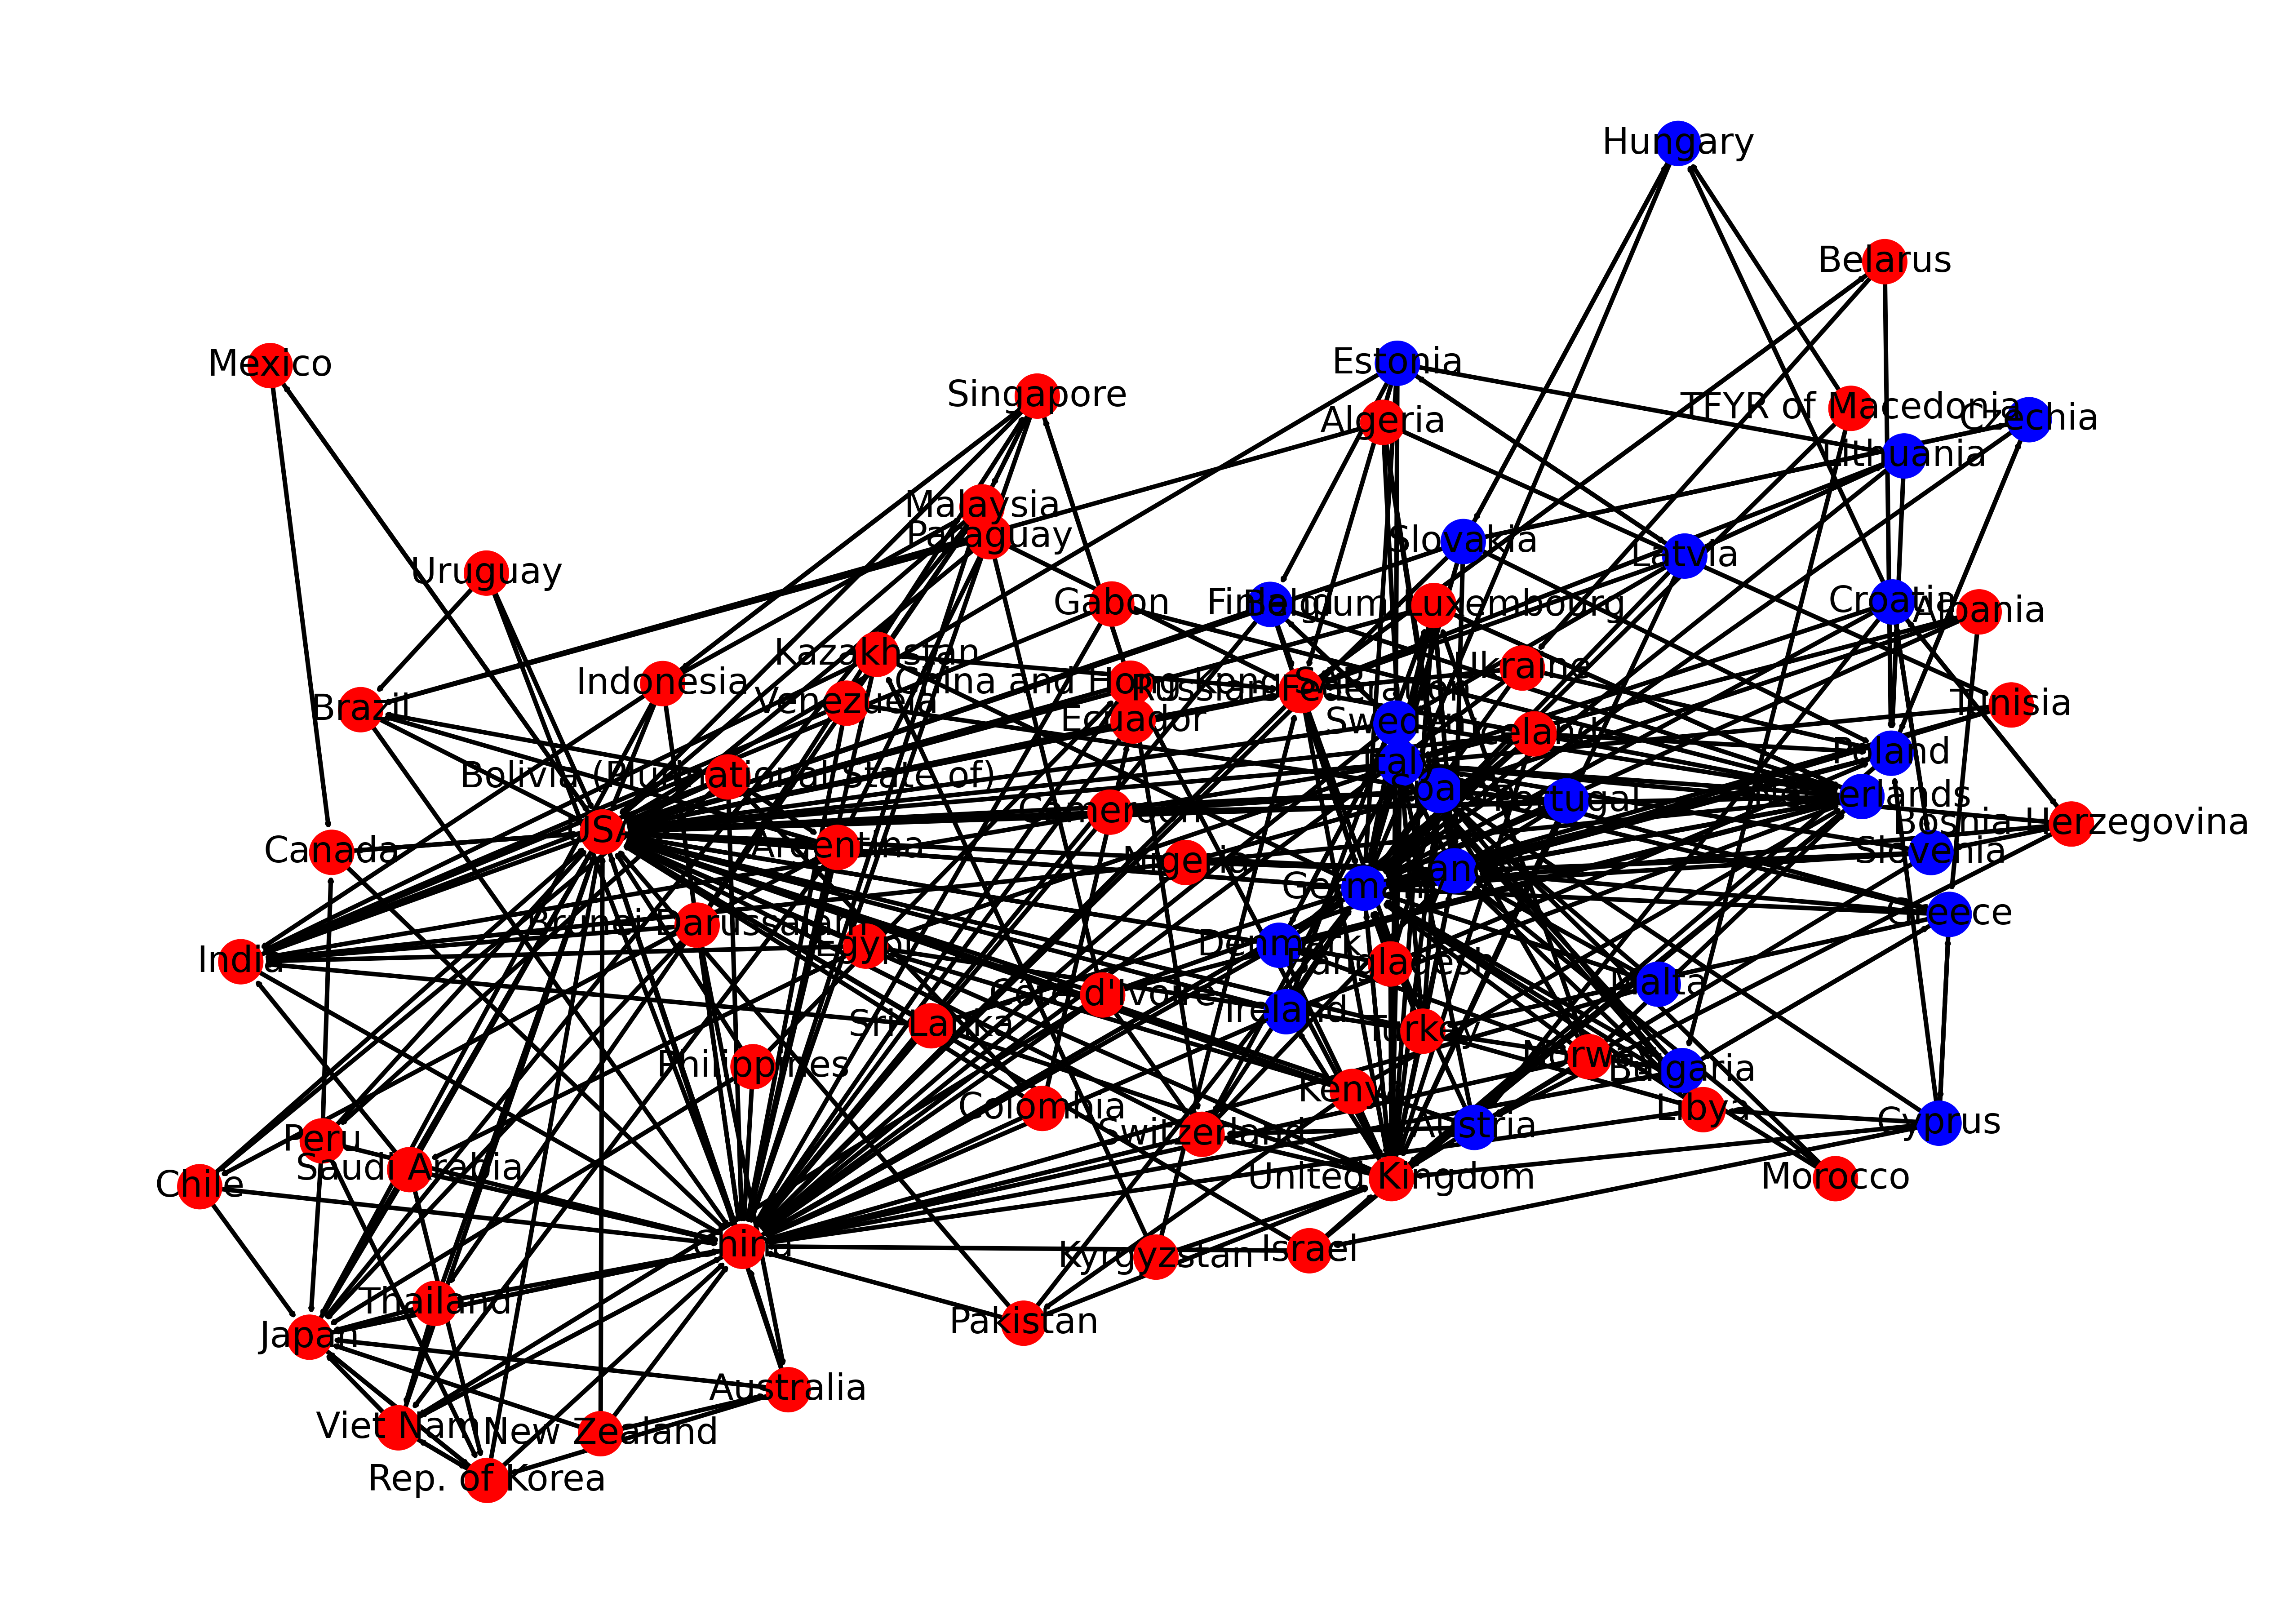

In [69]:
Graph_2020_UE=nx.MultiDiGraph()
Graph_2020_UE = nx.from_pandas_edgelist(data_relevant, 'exporter_name', 'importer_name', True, nx.MultiDiGraph())
color_UE=list(pd.DataFrame(Graph_2020_UE.nodes())[0].apply(is_in_UE))
plt.figure(3, figsize=(70,50))
nx.draw(Graph_2020_UE, 
        with_labels=True, 
        font_size=80, 
        node_color=color_UE, 
        node_size=10000, #this should be dependent of exporter volume, or maybe log of exportervolume
        width = 10
        #this should be dependent on trade volume
       )
# plt.savefig('graph_2020.png', dpi=300, bbox_inches='tight')
plt.show()

## Importer and exporter noteworks comparison

In [49]:
country_data=pd.read_csv('data_complete_3_years.csv')
data_2018_exp=country_data[country_data['relative_volume_2018']>.05][['exporter_name', 'importer_name']]
country_data=pd.read_csv('data_complete_3_years.csv')
data_2020_exp=country_data[country_data['relative_volume_2020']>.05][['exporter_name', 'importer_name']]
country_data=pd.read_csv('data_complete_3_years.csv')
data_2019_exp=country_data[country_data['relative_volume_2019']>.05][['exporter_name', 'importer_name']]

In [50]:
def add_relative_volume(df, year):
    df_temp = df.copy()
    rel_vols = []
    for exp in df_temp.exporter.unique():
        total_volume = df_temp[df_temp["importer"] == exp]["v"+str(year)].sum()
        for vol in df_temp[df_temp["importer"] == exp]["v"+str(year)]:
            rel_vol = vol/total_volume
            rel_vols.append(rel_vol)
    df_temp["relative_volume"+"_"+str(year)+'_importer'] = rel_vols
    return df_temp

In [52]:
country_data=add_relative_volume(country_data, 2018)
country_data=add_relative_volume(country_data, 2019)
country_data=add_relative_volume(country_data, 2020)

data_2018_imp=country_data[country_data['relative_volume_2018_importer']>.05][['exporter_name', 'importer_name']]
data_2019_imp=country_data[country_data['relative_volume_2019_importer']>.05][['exporter_name', 'importer_name']]
data_2020_imp=country_data[country_data['relative_volume_2020_importer']>.05][['exporter_name', 'importer_name']]

Graph_2018_exp = nx.from_pandas_edgelist(data_2018_exp, 'exporter_name', 'importer_name', None, nx.MultiDiGraph())
Graph_2019_exp = nx.from_pandas_edgelist(data_2019_exp, 'exporter_name', 'importer_name', None, nx.MultiDiGraph())
Graph_2020_exp = nx.from_pandas_edgelist(data_2020_exp, 'exporter_name', 'importer_name', None, nx.MultiDiGraph())

Graph_2018_imp = nx.from_pandas_edgelist(data_2018_imp, 'importer_name', 'exporter_name', None, nx.MultiDiGraph())
Graph_2019_imp = nx.from_pandas_edgelist(data_2019_imp, 'importer_name', 'exporter_name', None, nx.MultiDiGraph())
Graph_2020_imp = nx.from_pandas_edgelist(data_2020_imp, 'importer_name', 'exporter_name', None, nx.MultiDiGraph())

liste_graphe=[[Graph_2018_exp,'Graph_2018_exp'], [Graph_2019_exp,'Graph_2019_exp'], [Graph_2020_exp,'Graph_2020_exp'],
              [Graph_2018_imp,'Graph_2018_imp'], [Graph_2019_imp,'Graph_2019_imp'], [Graph_2020_imp,'Graph_2020_imp']]
for i in liste_graphe :
    print(str(i[1]))
    print(nx.overall_reciprocity(i[0]))
    print(i[0].number_of_edges())

Graph_2018_exp
0.2204724409448819
381
Graph_2019_exp
0.21298701298701297
385
Graph_2020_exp
0.21220159151193635
377
Graph_2018_imp
0.17708333333333334
384
Graph_2019_imp
0.18508997429305912
389
Graph_2020_imp
0.19843342036553524
383


In [53]:
liste_weight=[]
Graph_2018_w=nx.MultiDiGraph()
Graph_2019_w=nx.MultiDiGraph()
Graph_2020_w=nx.MultiDiGraph()

#### Total weight, in each sense and for exports and imports

In [ ]:
edgeList=list(Graph_2018_imp.edges())+list(Graph_2018_exp.edges())
edgeweight=collections.Counter(edgeList)
for i in edgeweight :
    weights=edgeweight[i]
    if (i[1], i[0]) in edgeweight :
        weights+=edgeweight[(i[1], i[0])]
    Graph_2018_w.add_edge(i[0],i[1], weight=weights)
allW_2018=[i[2]['weight']for i in Graph_2018_w.edges(data=True)]

In [ ]:
edgeList2019=list(Graph_2019_imp.edges())+list(Graph_2019_exp.edges())
edgeweight2019=collections.Counter(edgeList2019)
for i in edgeweight2019 :
    weights=edgeweight2019[i]
    if (i[1], i[0]) in edgeweight2019 :
        weights+=edgeweight2019[(i[1], i[0])]
    Graph_2019_w.add_edge(i[0],i[1], weight=weights)
allW_2019=[i[2]['weight']for i in Graph_2019_w.edges(data=True)]

In [ ]:
edgeList2020=list(Graph_2020_imp.edges())+list(Graph_2020_exp.edges())
edgeweight2020=collections.Counter(edgeList2020)
for i in edgeweight2020 :
    weights=edgeweight2020[i]
    if (i[1], i[0]) in edgeweight2020 :
        weights+=edgeweight2020[(i[1], i[0])]
    Graph_2020_w.add_edge(i[0],i[1], weight=weights)
allW_2020=[i[2]['weight']for i in Graph_2020_w.edges(data=True)]

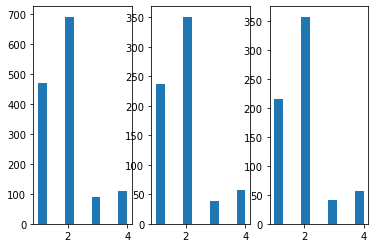

In [41]:
fig, axs = plt.subplots(1,3)
axs[0].hist(allW_2018)
axs[1].hist(allW_2019)
axs[2].hist(allW_2020)
plt.show()

Few links that are both central in importation and exportation of two countries in both sense : many unilateral power

#### Share of countries depending on a country that do not depends on it

In [ ]:
list_depending=[]
for i in Graph_2018_imp.edges() :
    if (i[1], i[0]) in Graph_2018_exp.edges() :
        list_depending.append(i)

list_depending_2019=[]
for i in Graph_2019_imp.edges() :
    if (i[1], i[0]) in Graph_2019_exp.edges() :
        list_depending_2019.append(i)
        
list_depending_2020=[]
for i in Graph_2020_imp.edges() :
    if (i[1], i[0]) in Graph_2020_exp.edges() :
        list_depending_2020.append(i)

necesarily unilateraly depends on a country that trades more 

In [45]:
list_depending

[('China', 'Argentina'),
 ('China', 'Australia'),
 ('China', 'Bolivia (Plurinational State of)'),
 ('China', 'Brazil'),
 ('China', 'Canada'),
 ('China', 'Switzerland'),
 ('China', 'Chile'),
 ('China', 'Cameroon'),
 ('China', 'Colombia'),
 ('China', 'Germany'),
 ('China', 'Ecuador'),
 ('China', 'Egypt'),
 ('China', 'Finland'),
 ('China', 'Gabon'),
 ('China', 'United Kingdom'),
 ('China', 'China and Hong Kong SAR'),
 ('China', 'Indonesia'),
 ('China', 'India'),
 ('China', 'Israel'),
 ('China', 'Japan'),
 ('China', 'Kazakhstan'),
 ('China', 'Rep. of Korea'),
 ('China', 'Libya'),
 ('China', 'Malta'),
 ('China', 'Malaysia'),
 ('China', 'New Zealand'),
 ('China', 'Pakistan'),
 ('China', 'Peru'),
 ('China', 'Philippines'),
 ('China', 'Russian Federation'),
 ('China', 'Saudi Arabia'),
 ('China', 'Singapore'),
 ('China', 'Slovakia'),
 ('China', 'Thailand'),
 ('China', 'Ukraine'),
 ('China', 'Uruguay'),
 ('China', 'USA'),
 ('China', 'Venezuela'),
 ('China', 'Viet Nam'),
 ('Germany', 'Albania'),


In [ ]:
list_unilateraly_depending=[]
for i in list_depending :
    if (i[1], i[0]) not in Graph_2018_imp.edges() and (i[0], i[1]) not in Graph_2018_exp.edges() :
        list_unilateraly_depending.append(i)
list_unilateraly_depending_2019=[]
for i in list_depending_2019 :
    if (i[1], i[0]) not in Graph_2019_imp.edges() and (i[0], i[1]) not in Graph_2019_exp.edges() :
        list_unilateraly_depending_2019.append(i)
list_unilateraly_depending_2020=[]
for i in list_depending_2020 :
    if (i[1], i[0]) not in Graph_2020_imp.edges() and (i[0], i[1]) not in Graph_2020_exp.edges() :
        list_unilateraly_depending_2020.append(i)

In [ ]:
print('2018',len(list_unilateraly_depending), len(list_depending))
print('2019',len(list_unilateraly_depending_2019), len(list_depending_2019))
print('2020', len(list_unilateraly_depending_2020), len(list_depending_2020))


In [ ]:
list_influential_country=[]
for i in list_unilateraly_depending :
    list_influential_country.append(i[0])
list_influential_country_2019=[]
for i in list_unilateraly_depending_2019 :
    list_influential_country_2019.append(i[0])
list_influential_country_2020=[]
for i in list_unilateraly_depending_2020 :
    list_influential_country_2020.append(i[0])

In [ ]:
number_influenced=[]
for i in list(set(list_influential_country)) :
    number_influenced.append(list_influential_country.count(i))
influential = pd.DataFrame()
influential['country']=list(set(list_influential_country))
influential['number of depending countries 2018']=number_influenced


number_influenced_2019=[]
for i in list(set(list_influential_country_2019)) :
    number_influenced_2019.append(list_influential_country_2019.count(i))
influential_2019 = pd.DataFrame()
influential_2019['country']=list(set(list_influential_country_2019))
influential_2019['number of depending countries 2019']=number_influenced_2019

number_influenced_2020=[]
for i in list(set(list_influential_country_2020)) :
    number_influenced_2020.append(list_influential_country_2020.count(i))
influential_2020 = pd.DataFrame()
influential_2020['country']=list(set(list_influential_country_2020))
influential_2020['number of depending countries 2020']=number_influenced_2020

In [63]:
influential_total=influential.merge(influential_2019, on='country', how='outer').merge(
    influential_2020, on='country', how='outer')
influential_total[influential_total['number of depending countries 2020']>1]

country  number of depending countries 2018  \
1                Spain                                 4.0   
2            Australia                                 1.0   
3               Brazil                                 3.0   
5               France                                 7.0   
6   Russian Federation                                 7.0   
7               Turkey                                 1.0   
8                  USA                                27.0   
9              Germany                                28.0   
10               China                                34.0   
14              Poland                                 3.0   
15               Italy                                14.0   
18               Japan                                 6.0   
20         Netherlands                                 4.0   
21      United Kingdom                                 5.0   
26               India                                 3.0   
27             Hungary                                 1.0   
29             Austria                                 3.0   

    number of depending countries 2019  number of depending countries 2020  
1                                  2.0                                 2.0  
2                                  1.0                                 2.0  
3                                  3.0                                 3.0  
5                                  6.0                                 7.0  
6                                  7.0                                 7.0  
7                                  1.0                                 2.0  
8                                 29.0                                27.0  
9                                 31.0                                28.0  
10                                36.0                                38.0  
14                                 3.0                                 4.0  
15                                13.0                                13.0  
18                                 6.0                                 6.0  
20                                 6.0                                 7.0  
21                                 5.0                                 4.0  
26                                 3.0                                 3.0  
27                                 1.0                                 2.0  
29                                 2.0                                 3.0

In [ ]:
C_2020=[i for i in list_unilateraly_depending_2020 if i[0]=='China']
C_2018=[i for i in list_unilateraly_depending if i[0]=='China']

In [ ]:
Cnew=[i for i in C_2020 if i not in C_2018]
Cnomore=[i for i in C_2018 if i not in C_2020]

In [76]:
Cnew

[('China', 'Bulgaria'),
 ('China', 'Brunei Darussalam'),
 ('China', "Côte d'Ivoire"),
 ('China', 'Denmark'),
 ('China', 'Ireland'),
 ('China', 'Nigeria'),
 ('China', 'Norway'),
 ('China', 'Sweden')]

In [77]:
Cnomore

[('China', 'Egypt'),
 ('China', 'United Kingdom'),
 ('China', 'Malaysia'),
 ('China', 'Viet Nam')]

In [45]:
list_unilateraly_depending

[('China', 'Argentina'),
 ('China', 'Bolivia (Plurinational State of)'),
 ('China', 'Brazil'),
 ('China', 'Canada'),
 ('China', 'Switzerland'),
 ('China', 'Chile'),
 ('China', 'Cameroon'),
 ('China', 'Colombia'),
 ('China', 'Ecuador'),
 ('China', 'Egypt'),
 ('China', 'Finland'),
 ('China', 'Gabon'),
 ('China', 'United Kingdom'),
 ('China', 'China and Hong Kong SAR'),
 ('China', 'Indonesia'),
 ('China', 'India'),
 ('China', 'Israel'),
 ('China', 'Kazakhstan'),
 ('China', 'Libya'),
 ('China', 'Malta'),
 ('China', 'Malaysia'),
 ('China', 'New Zealand'),
 ('China', 'Pakistan'),
 ('China', 'Peru'),
 ('China', 'Philippines'),
 ('China', 'Russian Federation'),
 ('China', 'Saudi Arabia'),
 ('China', 'Singapore'),
 ('China', 'Slovakia'),
 ('China', 'Thailand'),
 ('China', 'Ukraine'),
 ('China', 'Uruguay'),
 ('China', 'Venezuela'),
 ('China', 'Viet Nam'),
 ('Germany', 'Albania'),
 ('Germany', 'Belgium-Luxembourg'),
 ('Germany', 'Bulgaria'),
 ('Germany', 'Bosnia Herzegovina'),
 ('Germany', 'Switz

# 3 - Community detection

## 3.1 - On map

In [57]:
# Import
By_Country=pd.read_csv('By_Country.csv')
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
data_relevant = pd.read_csv("data_relevant_mars_30", sep=",")

# Preprocessing
world.iloc[43]= world.iloc[43].replace(to_replace='-99', value = 'FRA')
By_Country.iloc[33]= By_Country.iloc[33].replace(to_replace='HKG', value = 'CHN')
world.iloc[21]= world.iloc[21].replace(to_replace='-99', value = 'NOR')

# Merge
By_Country=pd.merge(By_Country,world[['iso_a3','geometry']], left_on='iso_3digit_alpha', right_on='iso_a3')
By_Country= By_Country.drop(['iso_a3'],axis=1)

In [58]:
# Weighted graph 2018
Graph_2018=nx.Graph()
list_country=list(data_relevant['importer_name'].unique())
Graph_2018.add_nodes_from(list_country)
Graph_2018.add_weighted_edges_from(zip(data_relevant['exporter_name'],data_relevant['importer_name'],data_relevant['relative_volume_2018'] ))


# Weighted graph 2020
Graph_2020=nx.Graph()
list_country=list(data_relevant['importer_name'].unique())
Graph_2020.add_nodes_from(list_country)
Graph_2020.add_weighted_edges_from(zip(data_relevant['exporter_name'],data_relevant['importer_name'],data_relevant['relative_volume_2020'] ))

In [59]:
partition_2020 = community_louvain.best_partition(Graph_2020)
partition_2018 = community_louvain.best_partition(Graph_2018)

In [60]:
print('Group0')
print([key for key,value in partition_2018.items() if value == 0])
print('Group1')
print([key for key,value in partition_2018.items() if value == 1])
print('Group2')
print([key for key,value in partition_2018.items() if value == 2])
print('Group3')
print([key for key,value in partition_2018.items() if value == 3])
print('Group4')
print([key for key,value in partition_2018.items() if value == 4])
print('Group5')
print([key for key,value in partition_2018.items() if value == 5])

Group0
['United Kingdom', 'Netherlands', 'Russian Federation', 'Ukraine', 'Norway', 'Sweden', 'Finland', 'Lithuania', 'Latvia', 'Belgium-Luxembourg', 'Denmark', 'Kazakhstan', 'Estonia', 'Belarus', "Côte d'Ivoire", 'Iceland', 'Kyrgyzstan']
Group1
['Chile', 'China', 'Viet Nam', 'Japan', 'Rep. of Korea', 'India', 'Peru', 'Australia', 'Malaysia', 'Singapore', 'Thailand', 'Saudi Arabia', 'China and Hong Kong SAR', 'Indonesia', 'Brunei Darussalam', 'Cameroon', 'Gabon', 'Nigeria', 'New Zealand', 'Philippines', 'Uruguay', 'Venezuela']
Group2
['USA', 'Colombia', 'Ecuador', 'Israel', 'Ireland', 'Pakistan', 'Canada', 'Mexico', 'Kenya', 'Sri Lanka']
Group3
['Brazil', 'Argentina', 'Bolivia (Plurinational State of)', 'Paraguay']
Group4
['Germany', 'Spain', 'Greece', 'Italy', 'Switzerland', 'France', 'Poland', 'Turkey', 'Austria', 'Croatia', 'Slovenia', 'Libya', 'Slovakia', 'Tunisia', 'Portugal', 'Bulgaria', 'Cyprus', 'Bosnia Herzegovina', 'Hungary', 'Egypt', 'Czechia', 'Albania', 'Bangladesh', 'Alge

In [61]:
def rename_clusters (partition) : 
    '''
    Rename Clusters to help color comparision on the map
    '''
    # USA group label : 100 
    USA = partition['USA']
    partition.update( (k,0.1) for k in partition if partition[k]==USA)
    # Russian Federation group label : 200 
    Russia = partition['Russian Federation']
    partition.update( (k,0.2) for k in partition if partition[k]==Russia)
    # France group label : 300 
    France=partition['France']
    partition.update( (k,0.3) for k in partition if partition[k]==France)
    # Australia group label : 400 
    Australia = partition['Australia']
    partition.update( (k,0.4) for k in partition if partition[k]==Australia)
    # India group label : 500 
    India = partition['India']
    partition.update( (k,0.5) for k in partition if partition[k]==India)
    # Brazil group label : 600 
    Brazil =partition['Brazil']
    partition.update( (k,0.6) for k in partition if partition[k]==Brazil)
    
rename_clusters(partition_2020)
rename_clusters(partition_2018)    

In [62]:
Cluster_2020 = pd.DataFrame.from_dict(partition_2020, orient='index',columns=['cluster_2020'])
Cluster_2018 = pd.DataFrame.from_dict(partition_2018, orient='index',columns=['cluster_2018'])

In [63]:
By_Country = pd.merge(By_Country,Cluster_2020, left_on='Country', right_on=Cluster_2020.index)
By_Country = pd.merge(By_Country,Cluster_2018, left_on='Country', right_on=Cluster_2018.index)

<AxesSubplot:>

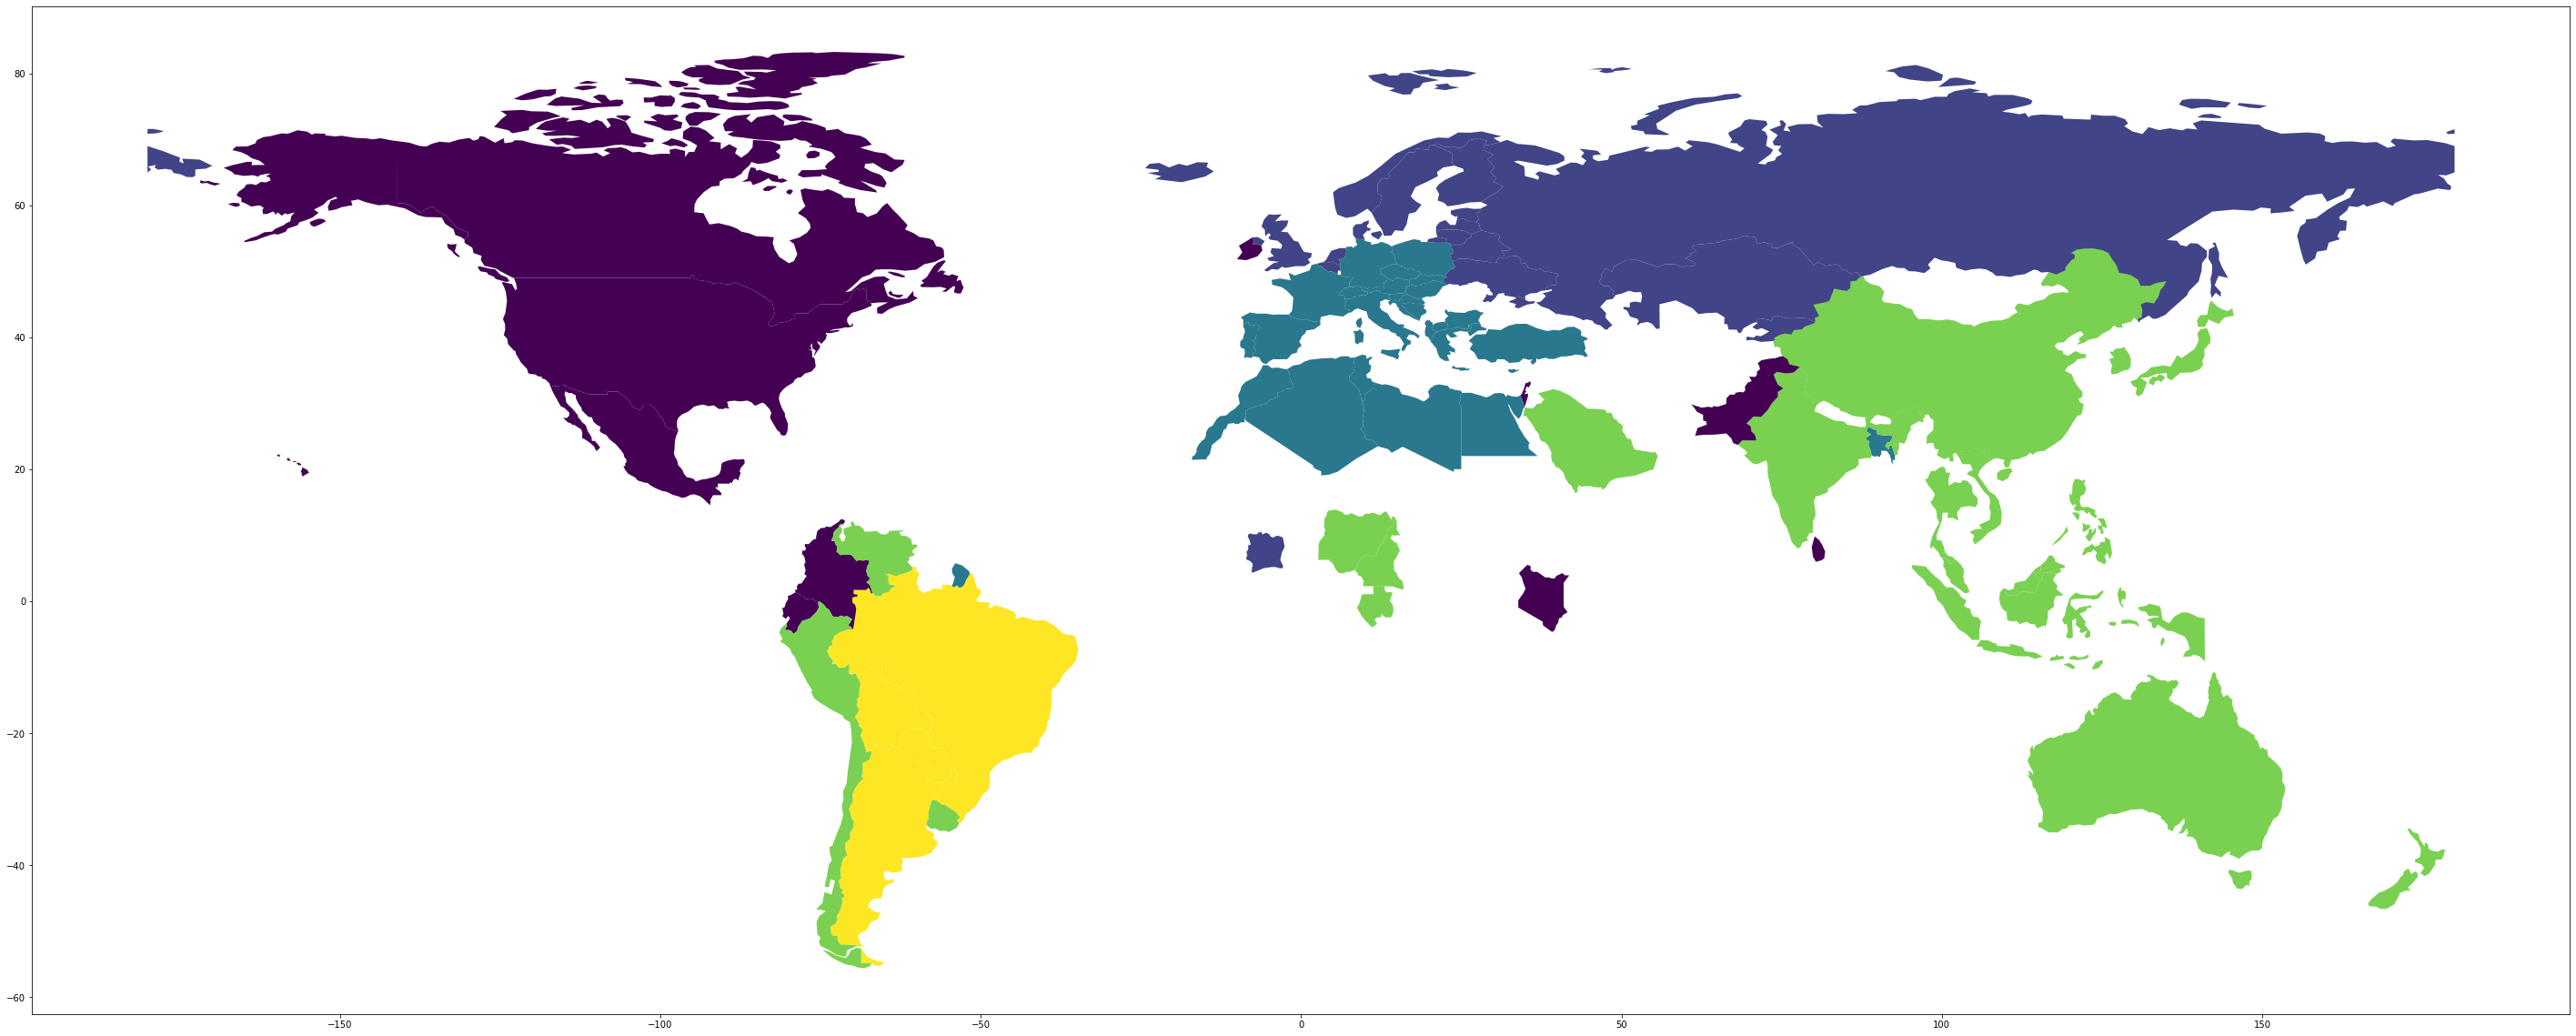

In [64]:
fig, ax = plt.subplots(figsize=(50, 50))
gdf = geopandas.GeoDataFrame(By_Country)
gdf.plot(column='cluster_2018', ax=ax)

<AxesSubplot:>

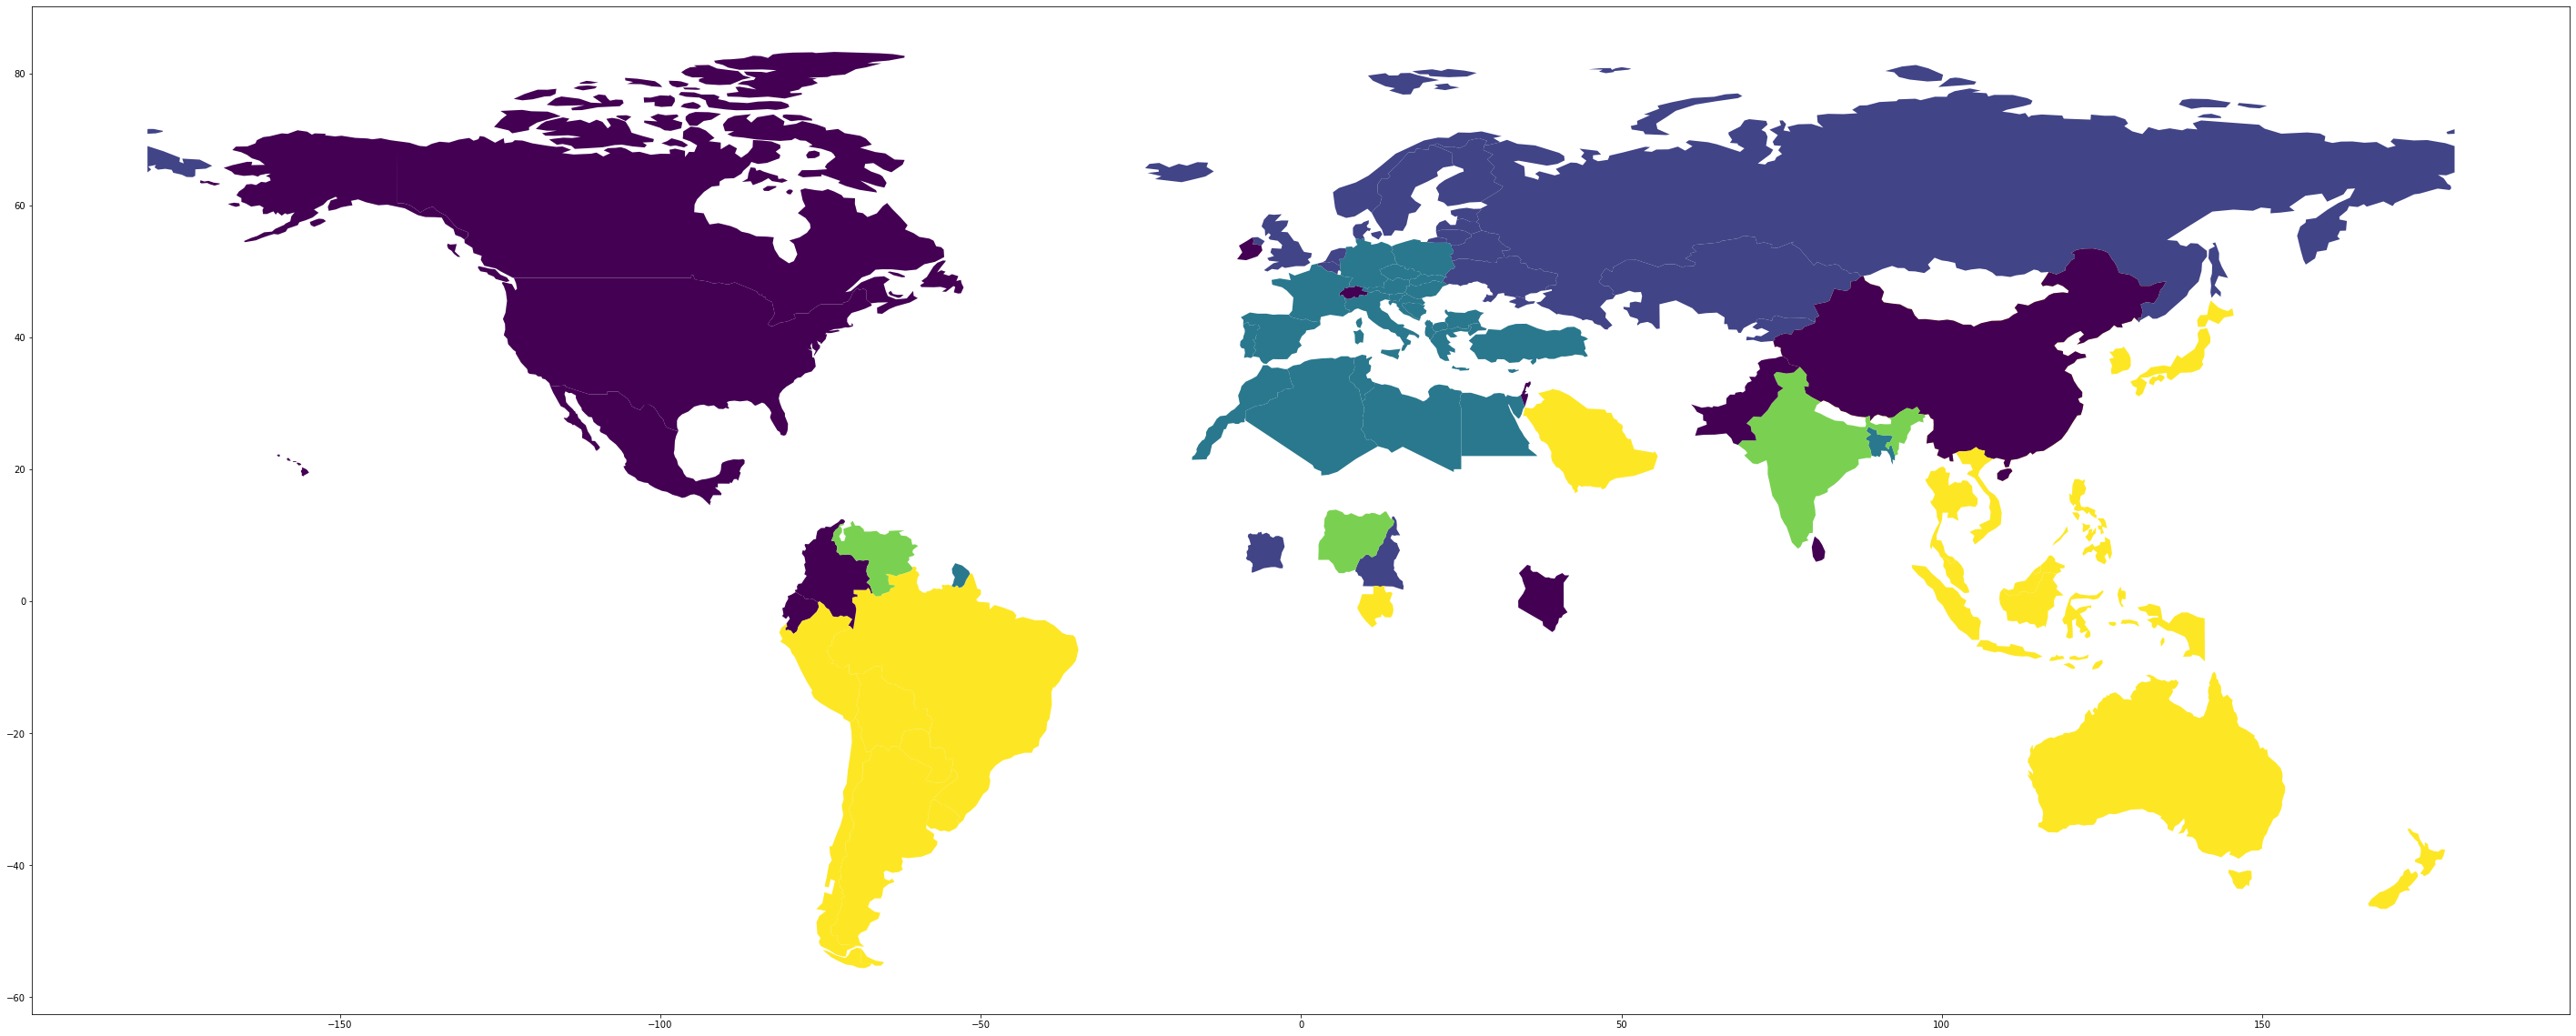

In [65]:
fig, ax = plt.subplots(figsize=(50, 50))
gdf = geopandas.GeoDataFrame(By_Country)
gdf.plot(column='cluster_2020', ax=ax)

## 3.2 - Graph distribution

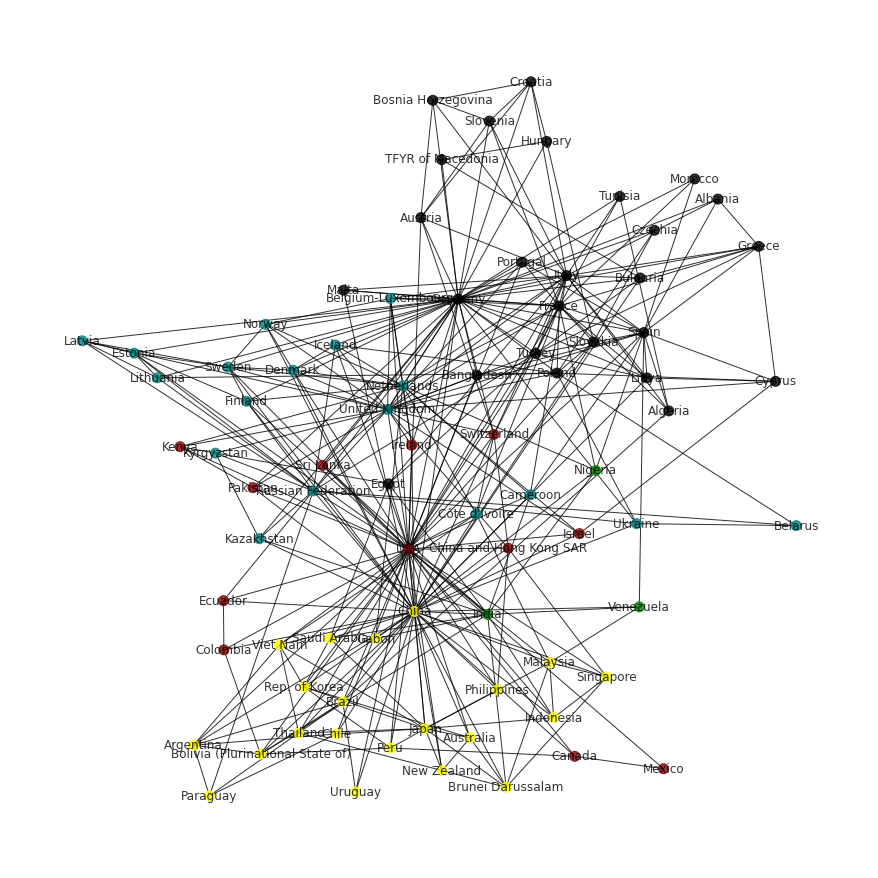

In [66]:
unique_coms = np.unique(list(partition_2020.values()))
cmap = {
    0.1 : 'maroon',
    0.2 : 'teal',
    0.3 : 'black', 
    0.4 : 'orange',
    0.5 : 'green',
    0.6 : 'yellow'
}

node_cmap = [cmap[v] for _,v in partition_2020.items()]

pos = nx.spring_layout(Graph_2020)
plt.figure(3, figsize=(12,12))

nx.draw(Graph_2020, pos, node_size = 100,  with_labels=True, alpha = 0.8, node_color=node_cmap)
plt.show()